In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://nekdo.ru/short/'

In [3]:
page = requests.get(url)
print(page.status_code)

200


In [4]:
soup = BeautifulSoup(page.text, "html.parser")

In [18]:
print(soup)

<!DOCTYPE html>

<html lang="ru">
<head>
<title>Короткие анекдоты</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width" name="viewport"/>
<meta content="анекдоты, свежие анекдоты, смешные анекдоты, короткие анекдоты, шутки, приколы, юмор, некдо" name="keywords"/>
<meta content="Короткие и смешные анекдоты менее 80 символов. Лучшие анекдоты с возможностью поиска и выбора случайных или самых смешных приколов." name="description"/>
<meta content="Анекдоты от nekdo.ru" property="og:title"/>
<meta content="Минимум трафика – максимум юмора. До 100 свежих анекдотов ежедневно." property="og:description"/>
<link href="/favicon.svg" rel="icon"/>
<link href="/style.css" rel="stylesheet" type="text/css"/>
<link as="font" crossorigin="" href="/awesome.woff" rel="preload"/>
<link href="https://nekdo.ru/short/" rel="canonical"/>
<script>window.yaContextCb=window.yaContextCb||[]</script>
<script async="" src="https://yandex.ru/ads/system/contex

In [25]:
%%time

anecdotes = []

for k in range(1, 1000):
    url = 'https://nekdo.ru/short/' + str(k) +'/'
    
    page = requests.get(url)
    if page.status_code != 200:
        print('Ошибка', page.status_code)
        
    soup = BeautifulSoup(page.text, "html.parser")

    anecdotes_page = soup.findAll('div', class_='text')
    for i, a in enumerate(anecdotes_page):
        if 'br' not in str(a):
            anecdotes.append(a.text)

CPU times: user 57.9 s, sys: 2.46 s, total: 1min
Wall time: 9min 13s


In [26]:
len(anecdotes)

25315

In [27]:
# не запускать

import csv
with open('anecdotes.csv', 'w') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    for item in anecdotes:
        csv_writer.writerow(item)

In [33]:
n_symb = []
n_words = []

for anec in anecdotes:
    n_symb.append(len(anec))
    n_words.append(len(anec.split()))

l = len(anecdotes)

Text(0, 0.5, 'Num of Anecdotes')

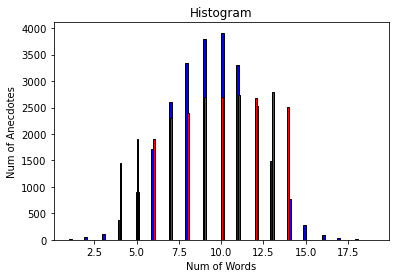

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df_words = pd.DataFrame(n_words)
df_words_nf = pd.DataFrame(n_words_nf)

# matplotlib histogram
plt.hist(df_words, color = 'blue', edgecolor = 'black', bins = 100)
plt.hist(df_words_nf, color = 'red', edgecolor = 'black', bins = 100)

# Add labels
plt.title('Histogram')
plt.xlabel('Num of Words')
plt.ylabel('Num of Anecdotes')

In [47]:
from collections import Counter
cnt_f = Counter(n_words)
cnt_f

Counter({10: 3914,
         6: 1711,
         8: 3344,
         7: 2611,
         12: 2533,
         11: 3297,
         13: 1494,
         4: 370,
         9: 3787,
         14: 763,
         5: 894,
         15: 288,
         16: 94,
         17: 35,
         3: 112,
         18: 6,
         1: 17,
         2: 44,
         19: 1})

In [48]:
cnt_nf = Counter(n_words_nf)
cnt_nf

Counter({7: 2307,
         5: 1903,
         13: 2802,
         14: 2517,
         10: 2708,
         11: 2746,
         8: 2388,
         6: 1900,
         12: 2689,
         9: 2701,
         4: 1447})

In [104]:
cnt_common

{10: 2708,
 6: 1711,
 8: 2388,
 7: 2307,
 12: 2533,
 11: 2746,
 13: 1494,
 4: 370,
 9: 2701,
 14: 763,
 5: 894}

In [56]:
cnt_common = {}

for i in cnt_f:
    if i in cnt_nf:
        i_common = min([cnt_f[i], cnt_nf[i]])
        
        cnt_common.update({i: i_common})

In [102]:
s = 0

for i in cnt_common:
    s += cnt_common[i]
    
s

20615

In [97]:
# сколько есть анекдотов длины Х
cnt_common_f = {}
new_list_f = []

with open('anecdotes.csv') as csvfile:
    csv_reader = csv.reader(csvfile)

    for line in csv_reader:
        line = ''.join(line)
        l = len(line.split())
        #print(l)
        
        # если анекдотов длины Х меньше, чем должно быть в общ. распр.
        if (l not in cnt_common_f) and (l in cnt_common):
            cnt_common_f.update({l: 0})
            
        if (l in cnt_common) and (l in cnt_common_f):
            if cnt_common[l] > cnt_common_f[l]:
                
                # обновляем кол-во анекдотов длины Х
                new_val = int(cnt_common_f[l]) + 1
                cnt_common_f.update({l: new_val})
                
                # добавляем анекдот с список
                new_list_f.append(line)

In [107]:
# сколько есть анекдотов длины Х
cnt_common_nf = {}
new_list_nf = []

with open('not_funny_fin.csv') as csvfile:
    csv_reader = csv.reader(csvfile)

    for line in csv_reader:
        line = line[0]
        l = len(line.split())
        
        # если анекдотов длины Х меньше, чем должно быть в общ. распр.
        if (l not in cnt_common_nf) and (l in cnt_common):
            cnt_common_nf.update({l: 0})
            
        if (l in cnt_common) and (l in cnt_common_nf):
            if cnt_common[l] > cnt_common_nf[l]:
                
                # обновляем кол-во анекдотов длины Х
                new_val = int(cnt_common_nf[l]) + 1
                cnt_common_nf.update({l: new_val})
                
                # добавляем анекдот с список
                new_list_nf.append(line)

Text(0, 0.5, 'Num of Anecdotes')

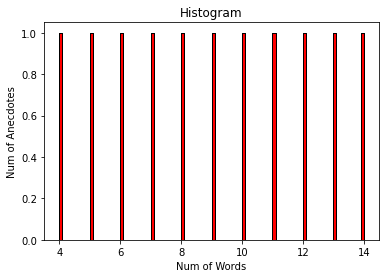

In [108]:
# matplotlib histogram
plt.hist(cnt_common_f, color = 'blue', edgecolor = 'black', bins = 100)
plt.hist(cnt_common_nf, color = 'red', edgecolor = 'black', bins = 100)

# Add labels
plt.title('Histogram')
plt.xlabel('Num of Words')
plt.ylabel('Num of Anecdotes')

In [109]:
with open('data2.csv', 'w') as csvfile:
    csv_writer = csv.writer(csvfile, delimiter = ',')
    
    csv_writer.writerow(['text', 'text_type'])
 
    for item in new_list_nf:
        csv_writer.writerow([item, '0'])
        
    for item in new_list_f:
        csv_writer.writerow([item, '1'])

In [113]:
cnt_common_f

{10: 2708,
 6: 1711,
 8: 2388,
 7: 2307,
 12: 2533,
 11: 2746,
 13: 1494,
 4: 370,
 9: 2701,
 14: 763,
 5: 894}

In [39]:
with open('anecdotes.csv') as csvfile:
    csv_reader = csv.reader(csvfile)

    for line in csv_reader:
        print(''.join(line))

Белорусский рубль скоро будет не валютой, а талоном на питание.
Мальчики меряются пенисами. А девочки вибраторами?
А я - антифаршист. Предпочитаю только цельное мясо.
Жесткий диск? А может лучше жесткое диско?
Абсолютно всем бывшим вы сказали Да в ЗАГСе.
Черная кошка перешла дорогу женщине с пустым ведром... Теперь у обеих проблемы.
Вначале было слово, а теперь слов нет...
На улице такой ливень, что электронное письмо и то пришло сырым.
Вор становится вором не тогда когда его ловят, а когда он ворует...
Очень немногие уважают депутатов, но очень многие хотели бы влиться в их число.
Решение сразу двух мировых проблем: "Скормить бездомных голодающим".
Настоящий джентльмен - это тот, кто умеет штробить перфоратором, но не штробит.
День рождения - это день, когда мама совершила для вас свой первый подвиг...
"Кока-кола" запретила использовать ее напиток для чистки стекол.
Выходя сухим из воды, не воображай себя богом.
Мужчина - это случайно выживший мальчик.
Уходя в себя, помни, что ты там 

Есть у меня специфическая черта - все идиотское называть спецефическим...
Не нужно косить, под гламурных куриц, парни любят нежных, парни любят умниц.
Я и не думал делать эту хрень, пока меня не стали от нее отговаривать...
Только сейчас понял, что основатель Рима - это Маугли.
Спасибо за монгольские титры внизу экрана! Выбил языком три зуба.
Я забираю свои слова обратно, я придумала пообиднее.
- Чтобы высушить волосы, достаточно быстро поползать около батареи.
Ничто так не стройнит женщину, как полная подруга.
Только сев в позу лотоса, можно почувствовать себя настоящим нарциссом.
Он сделал ей предложение. А потом предложение назвали Васей.
Вам девушкам вообще хорошо: захотел есть - пошел сварил.
Совсем скоро "старый пердун" и "пишущий без ошибок" станут синонимами.
Тамара была как вакцина "Спутник V" - прошла испытание на нескольких ученых.
Ложка состоит из держала, хлебала и перемычки.
- А это все равно считается изнасилованием, если я тр#хнул ее в пустой церкви?
Да хрен с ней, с лю

В детстве я хотела стать актрисой или Жириновским.
Я олимпийский чемпион по фигурному валянию на диване...
КМС по ПМС.
Садиться за стол переговоров с врагами лучше, чем ложиться с ними в могилу.
Я человек простой. Сдал экзамен, забыл предмет.
Зимой дороги на Рублевке посыпают солью и корицей с базиликом и кардамоном.
Фантастические бенедикты и где они камбербэтчат.
Чтобы в некоторых местах похудеть, нужно в некоторых местах не жрать!
Три часа безрезультатно ползал комар по заслуженному донору России...
Гуляющих девушек легко перепутать с гулящими.
Никогда не курил. Какую книгу прочитать, чтобы начать?
Вот только не надо думать, что все вокруг гондоны, а ты воздушный шарик!
- И что это вы, девушка, так загадочно снизу улыбаетесь?
Докапываясь до истины, ты обязательно роешь кому-нибудь яму.
Самостоятельные дети вырастут только у ленивых родителей.
Поставила набухать тесто, и чтобы ему не было скучно набухалась вместе с ним.
Я всегда поступаю правильно, после того как испробую все остальн

Поставил будильник на калькуляторе и выспался!
Купила чай для похудения, ничего так, с тортиком пойдет.
С точки зрения травы корова - хищник.
Русские так долго запрягают, что в результате забывают куда хотели ехать!
Шизофреник на фоне дебилов кажется гением.
Ваши принципы - ваши проблемы.
Если в муравейнике отсутствует субординация, то это торт.
Наш девиз непобедим, скучно стало - поедим.
Познакомил сына с творчеством Кафки. Пусть лучше от меня, чем во дворе.
Сначала ты работаешь на зачетку, а потом кассиром в продуктовом.
В Берлине началась депортация афганских нелегалов на их родину, в Кельн.
А экзамены все ближе, а ты все тупее.
До 40 лет мы издеваемся над своим организмом, а после 40 он над нами.
- Дорогая, я всегда считал наши отношения каким-то браком...
Чтобы лишний раз досадить женщине, мужчины придумали возраст.
Беспощадно время тикает в часах, ты сегодня в стрингах, завтра в рейтузах.
Когда ты находишь пятисотку в своей куртке, это сильно бесит гардеробщиц!
Мой май не такой у

Взглянув трезво на некоторые вещи, понимаешь - надо выпить...
Узкий кругозор помогает только снайперам.
В боях без правил, как правило, побеждают женские слезы.
Сидел в консерватории без наушников. Просимфонило.
Северный Корейко.
Уже больше двадцати лет я являюсь для своих родителей убыточной инвестицией.
Бери от жизни все, что можно! И капельку, чего нельзя...
- Если вы дыхнули на девушку, и ее глаза запотели, значит, она к вам холодна.
Почему американцы так хороши в стрельбе? У них лучшие школы для тренировок.
Как Алла смогла так похудеть? Читайте инструкцию к Photoshop.
Горячая крышка на кастрюле выглядит так же, как и холодная!
Хорошие мужья не делают замечаний жене, не так забивающей гвоздь.
Чтобы ночью скрыться от погони, надо бежать медленно, чтобы пятки не сверкали.
Не крутите мне мои фаберже!
Наш человек пользуется подземным переходом только по нужде.
Очень начитанный диджей сводит в свой микс аудиокниги.
Работа в офисе - полная херня. Ни цветмета украсть, ни бухнуть в бытовке

Относитесь к своим костям уважительно, ведь они вас переживут.
Девушкам на заметку: лучший подарок - подарок, сделанный своими губами.
В горницу вошел негр в носках телесного цвета.
Ищу привлекательную тещу. Дочь - значения не имеет.
Нафига мне вагина, в которой нет тебя...
- Гражданин, наденьте маску, не пугайте людей!
Любить женщину с детьми тяжелее, чем с мужем.
Зеленский хотел, чтобы Меркель приехала в Украину, а она приехала на Украину.
- Не могу понять этих русских матрешек! Они всегда что-то скрывают в себе...
Опыт всегда приходит сразу после того, как был нужен.
Три слова, которые могут оскорбить любого мужчину: "Он уже внутри?".
Русская толерантность. Мы искренне любим всех тех, кому хоть раз набили морду.
Любовь - как наркотик, когда есть - кайф, когда нет - ломка...
Нелепая смерть: сотрудника ДПС убило доской ДСП.
И слышу, как будто моргает мне кто-то...
Приехал поручик Ржевский, и пошлость стала банальностью.
Передается ли статус иностранного агента половым путем?
Ссудили с

Ну что вы до человека до#бались? Не видите, ему некогда за дворцами следить?
Сантехник из нашей управляйки каждый день или в говне, или в говно.
Дворецкий Ротенберг.
Из-за короны, даже дворцом приходится пользоваться удаленно.
Собрал он своих друзей и говорит, кто вытащит короткую спичку, того и дворец.
Все мои друзья нынче в домашней аптечке и холодильнике.
Двадцать лет тупо молчал стояк в нашем туалете. Но вчера вдруг его прорвало...
Арест Навального оказался провокацией одного из двойников Путина.
Лайфхак. Если листать ленту на смартфоне членом, то ваще все пох#й.
Это получается, что за каждый год пробития дна - новый минус этаж?
Вот так проснешься однажды, а вся Россия уже на Ротенберга переписана.
Зять - неблагодарный родственник святой женщины.
Пора худеть - это когда она легла в ванну и там застряла.
Больше всего врут перед выборами, сексом и после рыбалки.
Блеяние стада баранов не более достоверно, чем блеяние одного.
Верующих много. Одни верят в Бога. Другие - в деньги. Знающи

С неповторимым мужчиной хочется - повторять и повторять!
Один мальчик стал мужчиной. Хотя маме говорил, что хочет стать космонавтом.
Плохая примета встречать поезд сидя на рельсах.
Она целовала его хилари, а он ласкал ее клинтон...
Путин запретил работать не по специальности и ушел работать в белорусский КГБ.
Супружество, как ипотека - долг отдается до старости или дефолта.
Как бы плохо мужчины не думали о женщинах, они о них думают, думают, думают...
В суде Ефремову предложили налить, чтобы он все вспомнил.
Говорят, Михаила Ефремова вообще не было в тот день на Земле.
Перейду дорогу любому. Недорого. Черная кошка.
Однажды Таня поцарапала Лексус, и на полгода стала Анжелой.
Жизнь иногда поворачивается такой стороной, что Камасутра отдыхает.
Жизненно необходимо иногда останавливать колесо и выгуливать белку.
Добро должно быть с кулаками, если нет кастета...
- Сеня, я сказала, что тебе "дам". Но это не значит, что уже "на".
Коронавирус - инфекция политическая.
Люблю жену, но не свою...
К

Президенту, у которого нет смартфона, вообще пох#й есть у вас интернет или нет.
Дети рабов коммунизма будут рабами и при капитализме.
ОПГ - обнуленная президентская группировка.
Диагноз - обнуление совести.
Колумб открыл Америку для европейцев, а Трамп ее закрыл.
Обрывки знаний хуже невежества.
Петрович пятый день в запое... А все потому, что первые четыре забыл обнулить.
Стадный инстинкт помогает выжить стаду, а не отдельной особи.
Выживут только фрилансеры.
Хотелось провалиться, но не давало дно.
А что если рубль не укрепился, а просто рублей стало меньше...
Трудоголики мечтают об инвесторе, лентяи о спонсоре.
Не перепутайте, ставят на вас или кладут.
Выбери меня, Мразь!
Порой мой кот смотрит на меня так, как будто мне пора жить отдельно...
Юмор - это пятое колесо в телеге жизни. Рулевое.
Теща - не машина, заводится с полслова.
Безнадежных больных не бывает, бывают безнадежные доктора.
Если интернет - наркотик, то провайдер - оптовик.
Солдаты - это те же дети, тольхо х#й больше и авт

Высший пилотаж блондинки - прикидываться, что она прикидывается дурой.
Быстро зажженное погасшим не считается.
В Египте волнениями и беспорядками отметили трехлетие волнений и бепорядков!
Пошел на фотоохоту. Завалил три горизонта.
Вставал утром на работу, нога запуталась в одеяле. Мое хорошее, не отпускает...
Кризис среднего возраста в Африке наступает в 9 лет.
На Новый год буду аналитиком! Буду следить: а у всех ли налито?
Я не расист, но зима должна быть белой.
Мусорно-люстрационные баки - пример оборудования двойного назначения.
Врачебное искусство - вот что действительно требует жертв.
Счастье - это когда в аптеке, кроме презервативов, ничего не нужно.
Кто получает большие деньги, тот много работает.
Особенно радует человека белая полоса в жизни, когда он ее нюхает.
Странно то, что леса горели в Сибири, а курить запретили на балконах!
Снятие мужского стресса лучше всего начинать со снятия женской одежды.
Руководство для подростков: "Как не стать следующим мужем Аллы Пугачевой".
Инт

Скорость разрушения мозга прямо пропорциональна квадрату диагонали телевизора.
Теперь у пьяного Путина есть кому позвонить.
Люблю май. Май - это все равно, что пятница.
Страх на душе, глаза на лбу. Я на каблуках иду по льду!
- Больной, вам прописаны свечи. Приготовьте, пожалуйста, ваш канделябр...
То чувство, когда завтра уже сегодня, а ты еще вчера.
Из морепродуктов могу позволить себе соль.
Когда начальнику нечего сказать, это не значит, что он будет молчать.
Настоящий лидер всегда позади. Это вам скажет любой пастух.
Я так много читал о вреде алкоголя, что решил полностью отказаться от чтения.
- Иванушка, не пей из лужицы! Это на утро.
На любом медицинском консилиуме последнее слово всегда за патологоанатомом.
В России замалчивают комплименты женщинам.
Второй брак - победа надежды над жизненным опытом.
Лодыжка - это средство обнаружения углов мебели в темноте.
Теряя время с удовольствием, ты его не теряешь.
Ты худая, потому что змеи не толстеют.
Солнце русской поэзии - и то черное.


In [42]:
n_words_nf = []

with open('not_funny.csv') as csvfile:
    csv_reader = csv.reader(csvfile)

    for line in csv_reader:
        n_words_nf.append(len(line[0].split()))